In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn

# New

In [2]:
most_disrupted = ['CXCL8',
 'CCL4',
 'IGLL1',
 'CLC',
 'HPGDS',
 'UHRF1',
 'C1QTNF4',
 'ELANE',
 'CA1',
 'PROK2',
 'BAHCC1',
 'KLF1',
 'CCNA2',
 'CD24',
 'CD96',
 'MCM3',
 'PRSS21',
 'CDC20',
 'PHLDA1',
 'ASF1B']
 #'PRTN3',
 #'CXCL3',
 #'CTSL',
 #'CNRIP1']


In [3]:
paper = ['CD34', 'MEIS1', 'HOXA9']

In [4]:
deseq = pd.read_csv("deseq2_125AML_vs_305AML.csv",sep='\t')

In [5]:
deseq = deseq.dropna(subset=["log2FoldChange","pvalue"])

In [6]:
deseq.index = [i for i in range(deseq.shape[0])]

In [7]:
def plot_points(genes, data):
    x = data["log2FoldChange"]
    y = -1*np.log10(data["pvalue"])
    x_ = []
    y_ = []
    for i in genes:
        x_.append(x[list(data["Gene.names"]).index(i)])
        y_.append(y[list(data["Gene.names"]).index(i)])
    return x_,y_

In [8]:
def color(data, lower, left, right):
    '''
    color points in a dataset with a lower, right, and left threshold
    '''
    colors = []
    x = data["log2FoldChange"]
    y = -1*np.log10(data["pvalue"])
    for i in range(len(x)):
        if x[i]<left and y[i]>lower:
            colors.append("skyblue")
        elif x[i]>right and y[i]>lower:
            colors.append("orange")
        else:
            colors.append("lightgrey")
    return colors

In [9]:
from adjustText import adjust_text

96

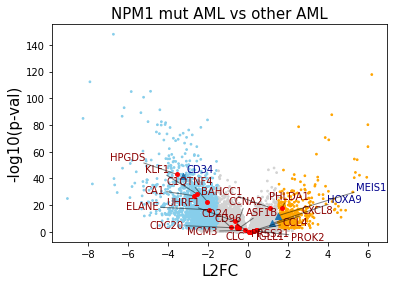

In [10]:
plt.scatter(deseq["log2FoldChange"],-1*np.log10(deseq["pvalue"]),s=3,
            c=color(deseq,2,-1.5,1.5))
blue_x, blue_y = plot_points(most_disrupted, deseq)
red_x, red_y = plot_points(paper, deseq)
plt.scatter(blue_x,blue_y,c='red',s=15)
plt.scatter(red_x, red_y,marker='^')
plt.xlabel("L2FC",fontsize=15)
plt.ylabel("-log10(p-val)",fontsize=15)
plt.title("NPM1 mut AML vs other AML",fontsize=15)
count=0

texts = []
for i in most_disrupted + paper:

    if i in paper:
        c='darkblue'
    else:
        c='darkred'
    texts.append(plt.text(deseq["log2FoldChange"][list(deseq["Gene.names"]).index(i)],
                     -1*np.log10(deseq["pvalue"])[list(deseq["Gene.names"]).index(i)],
                         i,color=c,fontsize=10
    ))
    count+=1

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black',alpha=.5))
#plt.savefig("bulkfig_ext.pdf")

In [11]:
deseq_npm = pd.read_csv("deseq2_125NPM1_vs_16ED.csv",sep="\t")
deseq_npm = deseq_npm.dropna(subset=["log2FoldChange","pvalue"])
deseq_npm.index = [i for i in range(deseq_npm.shape[0])]

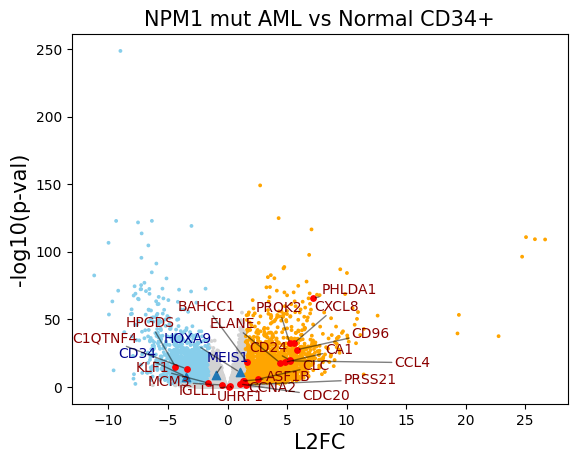

In [229]:

plt.scatter(deseq_npm["log2FoldChange"],-1*np.log10(deseq_npm["pvalue"]),s=3,
            c=color(deseq_npm,2,-1.5,1.5))
blue_x, blue_y = plot_points(most_disrupted, deseq_npm)
red_x, red_y = plot_points(paper, deseq_npm)
plt.scatter(blue_x,blue_y,c='red',s=15)
plt.scatter(red_x, red_y,marker='^')
plt.xlabel("L2FC",fontsize=15)
plt.ylabel("-log10(p-val)",fontsize=15)
plt.title("NPM1 mut AML vs Normal CD34+",fontsize=15)
count=0
texts=[]
for i in most_disrupted+paper:

    if i in paper:
        c='darkblue'
    else:
        c='darkred'
    texts.append(plt.text(deseq_npm["log2FoldChange"][list(deseq_npm["Gene.names"]).index(i)],
                     -1*np.log10(deseq_npm["pvalue"])[list(deseq_npm["Gene.names"]).index(i)],
                         i,color=c,fontsize=10
    ))
    count+=1

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black',alpha=.5))


plt.savefig("bulkfig_3e.pdf")

In [12]:
inter = np.intersect1d(deseq["ID"],deseq_npm["ID"])

In [13]:
deseq_npm = deseq_npm.loc[deseq_npm["ID"].isin(inter)]
deseq_npm.index = [i for i in range(len(inter))]
deseq = deseq.loc[deseq["ID"].isin(inter)]
deseq.index = [i for i in range(len(inter))]

In [14]:
for i in range(deseq_npm.shape[0]):
    if deseq_npm["ID"][i]!=deseq["ID"][i]:
        print("barcode mismatch")

In [15]:
analysis = []
for gene in deseq_npm["Gene.names"]:
    if type(gene)!=float:
        if "HOX" in gene:
            analysis.append(gene)

In [16]:
analysis = ["CD34","CCL4","CXCL8","ELANE","HOXA3","HOXA9","HOXA10","HOXB2","HOXB3","HOXB4"]

In [17]:
deseq_npm.index = deseq_npm["Gene.names"]

In [18]:
select_tfs = deseq_npm.loc[analysis][["log2FoldChange","pvalue","padj"]]

In [19]:
select_tfs[abs(select_tfs["log2FoldChange"])>1].shape

(9, 3)

In [20]:
select_tfs[abs(select_tfs["log2FoldChange"])>1]

,log2FoldChange,pvalue,padj
Gene.names,,,
CD34,-3.518071,2.009050e-08,1.353562e-07
CCL4,5.254290,5.424596e-20,1.545947e-18
CXCL8,5.618247,2.897343e-33,2.697176e-31
ELANE,4.419257,1.628688e-18,3.969238e-17
HOXA3,1.314023,7.741627e-15,1.224439e-13
HOXA9,1.041252,1.447828e-11,1.498827e-10
HOXA10,1.517702,9.016276e-29,5.751287e-27
HOXB3,1.417200,1.181067e-08,8.207496e-08
HOXB4,1.201034,1.472797e-07,8.700153e-07


In [101]:
aml1 = pd.read_csv("AML1.disruption_scores.csv")
aml1.index = aml1['gene']
#read in TFs list
tfs=pd.read_csv("Human_TF_MotifList_v_1.01.txt",sep='\t')

tfs_in=[]
for i in tfs["HGNC symbol"]:
    if i in aml1['gene']:
        tfs_in.append(i)
tfs_in=np.unique(tfs_in)

combined_disrupt = list(aml1.loc[tfs_in].sort_values(by="combined",ascending=False)[0:30]["gene"])

In [79]:
share = np.intersect1d(combined_disrupt,[i for i in deseq_npm["Gene.names"] if type(i)!=float])

In [80]:
len(share)

20

In [81]:
select_tfs = deseq_npm.loc[share][["log2FoldChange","pvalue","padj"]].sort_values(by='log2FoldChange')

In [82]:
select_tfs[abs(select_tfs["log2FoldChange"])<=1].index

Index(['POU2AF1', 'MYBL2'], dtype='object', name='Gene.names')

In [112]:
test = aml1.loc[tfs_in].sort_values(by="combined", ascending=False).iloc[0:20].index

In [113]:
all_genes = [
 "CD34", "GATA1","PBX3","MAFB","ELF4","KLF1","CEBPA","CEBPE","ZBTB43", #development  
 "NFIL3","MYBL2","BHLHE40", #cell cycle
 "PRDM1","BCL6", #immune
 "CREB5","AHR","SMAD3", #signaling
 "FOSL1","FOSL2", #FOS/JUN family
 "HOXA3","HOXA9","HOXA10","HOXB2","HOXB3","HOXB4","MEIS1","HLX" #homeobox
 
]

In [114]:
for i in test:
    if i not in all_genes:
        print(i)

GFI1
HIC1
POU2AF1
PBX1
EBF1
NFIA


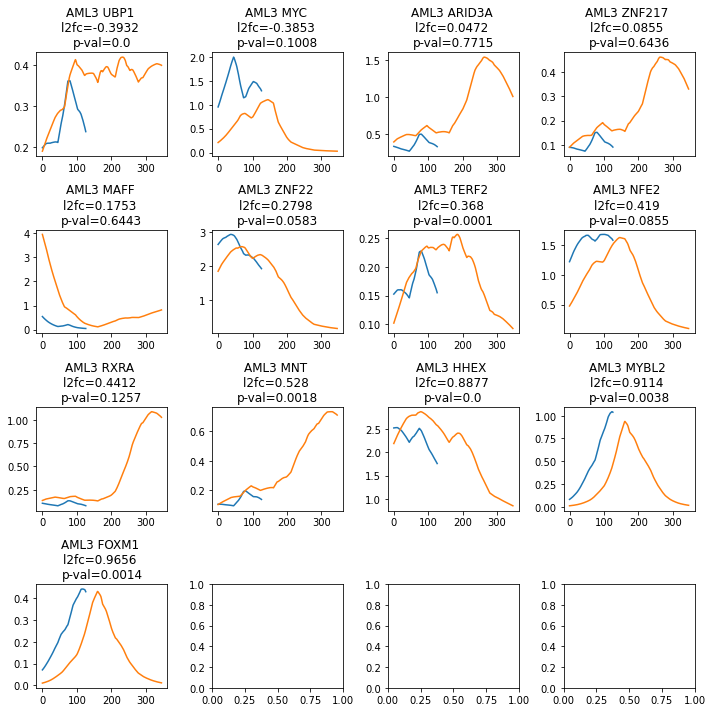

In [139]:
fig,ax = plt.subplots(4,4,figsize=(10,10))
no_de = select_tfs[abs(select_tfs["log2FoldChange"])<=1].index
for i in range(len(select_tfs[abs(select_tfs["log2FoldChange"])<=1].index)):
    ax[i//4][i%4].plot([i for i in range(normal_p.shape[0])],list(normal_p[no_de[i]]))
    ax[i//4][i%4].plot([i for i in range(blast_p.shape[0])],list(blast_p[no_de[i]]))
    ax[i//4][i%4].set_title("AML3 "+  no_de[i]+" \nl2fc="+str(round(select_tfs.loc[no_de[i]]["log2FoldChange"],4))
                            +" \np-val="+str(round(select_tfs.loc[no_de[i]]['pvalue'],4)))
plt.tight_layout()

In [62]:
gene_not_nan = [i for i in deseq_npm.index if type(i)==str]
deseq_npm["abs_L2FC"] = abs(deseq_npm["log2FoldChange"])


In [63]:
dup = []
genes = np.unique(gene_not_nan,return_counts=True)[0]
counts = np.unique(gene_not_nan,return_counts=True)[1]
for i in range(len(counts)):
    if counts[i]!=1:
        dup.append(genes[i])

In [64]:
gene_not_nan_no_dup = [i for i in gene_not_nan if i not in dup]

In [65]:
l2fc_sorted = deseq_npm.loc[gene_not_nan_no_dup].sort_values(by="abs_L2FC",ascending=False)
l2fc_sorted["ranking"] = [i for i in range(l2fc_sorted.shape[0])]

In [41]:
l2fc_sorted.loc[["HOXA3","HOXA9","HOXA10","HOXB3","HOXB2","HOXB4"]]["ranking"].mean()

14375.833333333334

In [116]:
l2fc_sorted.loc[["HOXA3","HOXA9","HOXA10","HOXB3","HOXB2","HOXB4"]]

,ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SPAT_score,Gene.names,gene_biotype,abs_l2fc,abs_L2FC,ranking
Gene.names,,,,,,,,,,,,,
HOXA3,ENSG00000105997,2041.173363,1.314023,0.169077,7.771738,7.741627e-15,1.224439e-13,0.0,HOXA3,protein_coding,1.314023,1.314023,10412
HOXA9,ENSG00000078399,9111.264891,1.041252,0.154190,6.753036,1.447828e-11,1.498827e-10,0.0,HOXA9,protein_coding,1.041252,1.041252,20390
HOXA10,ENSG00000253293,4037.397627,1.517702,0.136368,11.129477,9.016276e-29,5.751287e-27,0.0,HOXA10,protein_coding,1.517702,1.517702,8292
HOXB3,ENSG00000120093,10283.708284,1.417200,0.248525,5.702437,1.181067e-08,8.207496e-08,0.0,HOXB3,protein_coding,1.417200,1.417200,9266
HOXB2,ENSG00000173917,2693.797035,0.891627,0.254268,3.506641,4.538006e-04,1.430185e-03,0.0,HOXB2,protein_coding,0.891627,0.891627,25691
HOXB4,ENSG00000182742,2064.510174,1.201034,0.228510,5.255928,1.472797e-07,8.700153e-07,0.0,HOXB4,protein_coding,1.201034,1.201034,12204


In [86]:
l2fc_sorted.loc[select_tfs[abs(select_tfs["log2FoldChange"])>1].index].sort_values(by="abs_L2FC")[["abs_L2FC","pvalue","padj","ranking"]]

,abs_L2FC,pvalue,padj,ranking
Gene.names,,,,
ZBTB43,1.157675,8.606925e-05,3.143645e-04,12868
ELF4,1.223490,3.216915e-10,2.776235e-09,11831
EBF1,1.297519,2.370848e-03,6.393380e-03,10721
HOXA3,1.314023,7.741627e-15,1.224439e-13,10412
HOXB3,1.417200,1.181067e-08,8.207496e-08,9266
KLF1,1.600956,1.429985e-03,4.055006e-03,7696
GFI1,2.021291,3.778728e-29,2.474932e-27,5365
AHR,2.384497,2.315909e-11,2.340670e-10,4065
BCL6,2.458454,3.713881e-07,2.055186e-06,3835


In [87]:
12868/l2fc_sorted.shape[0]

0.2634186284544524

In [78]:
small=[]
for i in range(len(x)):
    if abs(x[i])<1 :
        small.append(deseq["Gene.names"][i])

In [79]:
tfs=pd.read_csv("Human_TF_MotifList_v_1.01.txt",sep='\t')
import numpy as np
tfs_in=[]
for i in tfs["HGNC symbol"]:
    if i in small:
        tfs_in.append(i)
tfs_in=np.unique(tfs_in)

In [80]:
aml1 = pd.read_csv("AML1.disruption_scores.csv",index_col="gene")

In [81]:
sort_small = aml1.loc[list(np.intersect1d(tfs_in,aml1.index))].sort_values(by='shape',ascending=False)

In [82]:
patterns=pd.read_csv("p89_healthy_gene_patterns.csv")

blast_p=patterns.loc[patterns["component"]=="blast"]
normal_p=patterns.loc[patterns["component"]=="normal"]


In [83]:
list(deseq_npm[deseq_npm["Gene.names"]=="DPM1"]["log2FoldChange"])

[0.883810039917978]